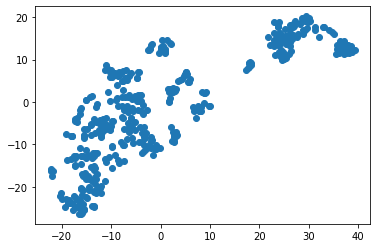

In [33]:
# Task 1

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.datasets import load_boston 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.manifold import TSNE

boston = load_boston()

data = boston['data'] 
target = boston['target'] 
feature_names = boston['feature_names']

X = pd.DataFrame(data, columns=feature_names) 
y = pd.DataFrame(target, columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test) 
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42) 
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]) 
plt.show()

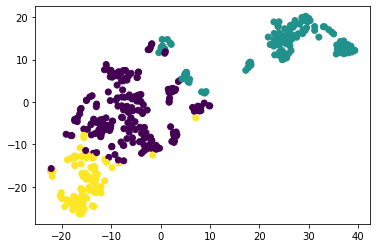

Кластер 0: price    24.958115
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    27.788372
dtype: float64
Кластер 0 по признаку CRIM: 0.42166020942408367
Кластер 1 по признаку CRIM: 10.797028425196853
Кластер 2 по признаку CRIM: 0.07356558139534886


In [88]:
# Task 2

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

print('Кластер 0: {}'.format(y_train.loc[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2].mean()))

print('Кластер 0 по признаку CRIM: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1 по признаку CRIM: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2 по признаку CRIM: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))




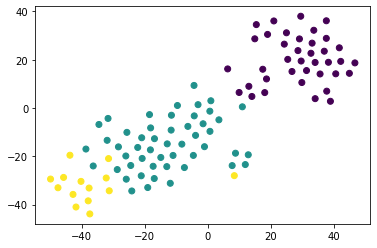

Кластер 0: price    16.710526
dtype: float64
Кластер 1: price    21.652
dtype: float64
Кластер 2: price    33.871429
dtype: float64
Кластер 0 по признаку CRIM: 9.419181842105264
Кластер 1 по признаку CRIM: 0.2244212
Кластер 2 по признаку CRIM: 0.08618571428571427


In [90]:
# Task 3

X_test_tsne = tsne.fit_transform(X_test_scaled)

labels_test = kmeans.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

print('Кластер 0: {}'.format(y_test.loc[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2].mean()))

print('Кластер 0 по признаку CRIM: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1 по признаку CRIM: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2 по признаку CRIM: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))